# Initializatoin

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
cd/content/drive/MyDrive/HW3

[Errno 2] No such file or directory: '/content/drive/MyDrive/HW3'
/content


In [ ]:
# cd /content/drive/MyDrive/Colab\ Notebooks/Deep\ Learning\ Course/HW03

## Imports

In [12]:
import math
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.datasets as datasets
import torchvision.transforms as transforms

from torch.autograd import Variable
from torch.nn import Parameter

from name_dataset import Dataset

# RNN

## Traditional RNN

In the introductory section, we delve into the architecture of Recurrent Neural Networks (RNNs) and elucidate their training methodologies. To gain a deeper understanding of RNNs, `you`'re encouraged to explore further [HERE](https://stanford.edu/~shervine/teaching/cs-230/cheatsheet-recurrent-neural-network)

in this notebook we have been furnished with the Names dataset, a compilation comprising thousands of surnames from 18 distinct languages of origin. our objective is to prognosticate the language of origin for a given name, relying solely on its orthography.

In [ ]:
dataset = Dataset()
for i in range(10):
    category, line, _, _ = dataset.randomTrainingExample()
    print('category =', category, '- random name =', line)

Files already exist, skipping download and extraction.
category = German - random name = Diefenbach
category = Arabic - random name = Shadid
category = Portuguese - random name = Mata
category = Scottish - random name = Wallace
category = English - random name = Leroy
category = Czech - random name = Bock
category = Russian - random name = Mindibekov
category = Arabic - random name = Touma
category = Vietnamese - random name = Vo
category = Irish - random name = Gerald


In [ ]:
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()


        self.hidden_size = hidden_size
        self.i2h =nn.Linear(input_size+hidden_size,hidden_size)
        self.h2o =nn.Linear(input_size+hidden_size,output_size)
        self.softmax =nn.LogSoftmax(dim=1)

    def forward(self, input, hidden):


        combined =torch.cat((input,hidden),1)

        hidden =self.i2h(combined)
        output =self.h2o(combined)
        output =self.softmax(output)
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, self.hidden_size)

n_hidden = 128
n_letters = dataset.n_letters
n_categories = dataset.n_categories
rnn = RNN(n_letters, n_hidden, n_categories)

In [ ]:

criterion =nn.NLLLoss()
learning_rate =1e-3
optimizer=torch.optim.SGD(rnn.parameters(),lr=learning_rate)
def train(category_tensor, name_tensor):
    hidden = rnn.initHidden()
    rnn.zero_grad()


    for i in range(name_tensor.size()[0]):
        output , hidden=rnn(name_tensor[i],hidden)

    loss = criterion(output, category_tensor)
    loss.backward()
    optimizer.step()

    # Add parameters' gradients to their values, multiplied by learning rate
    for p in rnn.parameters():
        p.data.add_(p.grad.data, alpha=-learning_rate)

    return output, loss.item()

5000 5% 2.8372 Guo is predicted as a "Italian" name, status = ✗ (Chinese)
10000 10% 2.7020 Sung is predicted as a "Vietnamese" name, status = ✗ (Korean)
15000 15% 2.0079 Avksentievski is predicted as a "Polish" name, status = ✗ (Russian)
20000 20% 2.0912 Stevenson is predicted as a "Russian" name, status = ✗ (Scottish)
25000 25% 1.3527 Crocetti is predicted as a "Italian" name, status = ✓
30000 30% 2.3581 Regent is predicted as a "French" name, status = ✗ (English)
35000 35% 2.4260 Brandt is predicted as a "Portuguese" name, status = ✗ (German)
40000 40% 1.2464 Jo is predicted as a "Korean" name, status = ✓
45000 45% 1.4624 Bello is predicted as a "Spanish" name, status = ✓
50000 50% 1.6620 Delgado is predicted as a "Spanish" name, status = ✗ (Portuguese)
55000 55% 1.2509 Ha is predicted as a "Vietnamese" name, status = ✗ (Korean)
60000 60% 2.6602 Guirguis is predicted as a "Portuguese" name, status = ✗ (Arabic)
65000 65% 1.5047 Schermer is predicted as a "German" name, status = ✗ (Dut

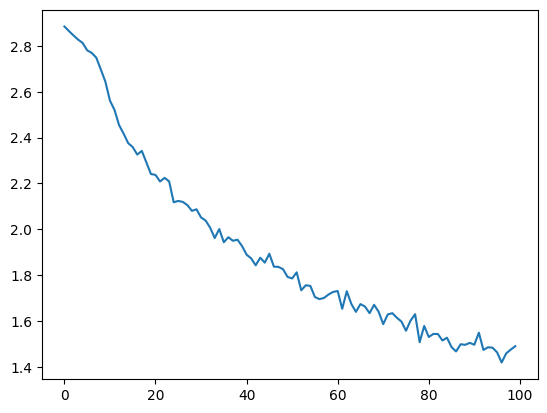

In [ ]:
n_iters = 100000
print_every = 5000

current_loss = 0
all_losses = []

for iter in range(1, n_iters + 1):
    category, line, category_tensor, line_tensor = dataset.randomTrainingExample()
    output, loss = train(category_tensor, line_tensor)
    current_loss += loss

    if iter % print_every == 0:
        guess, _ = dataset.categoryFromOutput(output)
        correct = '✓' if guess == category else '✗ (%s)' % category
        print('%d %d%% %.4f %s is predicted as a "%s" name, status = %s' % (iter, iter / n_iters * 100, loss, line, guess, correct))

    if iter % 1000 == 0:
        all_losses.append(current_loss / 1000)
        current_loss = 0

plt.figure()
plt.plot(all_losses)

## Traditional RNN Disadvantages

In this part, we aim to delve into the limitations of traditional RNNs:
1.   Recurrent computation is slow
2.   They have difficulty accessing information from many steps back.

i have provided  a simple code that helps you to give the idea better.

**Question:** Do you think using GPU instead of CPU completely solves the first problem?
___________________________________________________________________________
**Answer:** No , beacuse gpu works best when there are `parallel` computation but RNN structure works in `sequence`
___________________________________________________________________________


Epoch [10/100], Loss: 1.0555
Epoch [20/100], Loss: 0.9873
Epoch [30/100], Loss: 0.9217
Epoch [40/100], Loss: 0.8550
Epoch [50/100], Loss: 0.7819
Epoch [60/100], Loss: 0.6965
Epoch [70/100], Loss: 0.5955
Epoch [80/100], Loss: 0.4813
Epoch [90/100], Loss: 0.3637
Epoch [100/100], Loss: 0.2586


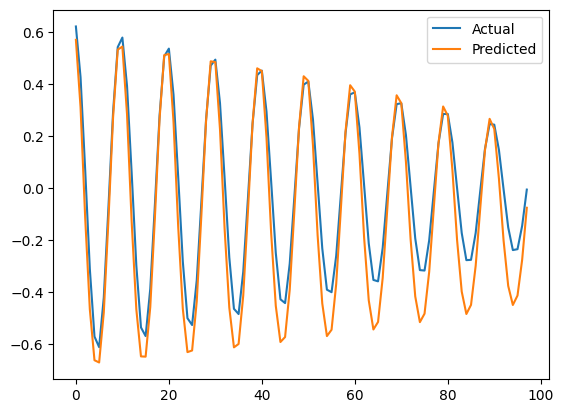

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# Generate sinusoidal temperature data with decreasing range over time
np.random.seed(0)
num_periods = 50
timesteps_per_period = 10
total_timesteps = num_periods * timesteps_per_period

# Generate decreasing factor
decreasing_factor = np.linspace(1, 0.1, total_timesteps)

# Generate temperature data with decreasing sinusoidal range
temperature_data = np.sin(np.linspace(0, 2*np.pi*num_periods, total_timesteps)) * decreasing_factor

# Normalize the data
temperature_data = (temperature_data - np.mean(temperature_data)) / np.std(temperature_data)

# Convert numpy array to PyTorch tensor
temperature_data = torch.tensor(temperature_data, dtype=torch.float32).view(-1, 1)

# Define function to create dataset with sinusoidal pattern
def create_dataset(data, seq_length):
    X, Y = [], []
    for i in range(len(data) - seq_length):
        seq_in = data[i:i+seq_length]
        seq_out = data[i+seq_length]
        X.append(seq_in)
        Y.append(seq_out)
    return torch.stack(X), torch.stack(Y)

# Define sequence length and create dataset
sequence_length = 10  # Number of previous days to look at for prediction
X, Y = create_dataset(temperature_data, sequence_length)

# Split the dataset into train and test sets
train_size = int(0.8 * len(X))
test_size = len(X) - train_size
X_train, X_test = X[:train_size], X[train_size:]
Y_train, Y_test = Y[:train_size], Y[train_size:]

# Define RNN model
class SimpleRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleRNN, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.rnn(x)
        out = self.fc(out[:, -1, :])
        return out

# Define model parameters
input_size = 1
hidden_size = 10
output_size = 1

# Instantiate the model
model = SimpleRNN(input_size, hidden_size, output_size)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    outputs = model(X_train)
    loss = criterion(outputs, Y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model
model.eval()
with torch.no_grad():
    test_predictions = model(X_test)

# Plot actual vs predicted
plt.plot(Y_test.numpy(), label='Actual')
plt.plot(test_predictions.numpy(), label='Predicted')
plt.legend()
plt.show()

# LSTM Preparation

In [ ]:
train_dataset = datasets.MNIST(root='./data',
                               train=True,
                               transform=transforms.ToTensor(),
                               download=True)

test_dataset = datasets.MNIST(root='./data',
                              train=False,
                              transform=transforms.ToTensor())

batch_size = 128
n_iters = 6000
num_epochs = int(n_iters / (len(train_dataset) / batch_size))


In [ ]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

## LSTM Cells

In [ ]:
class LSTMCell(nn.Module):
    def __init__(self, input_size, hidden_size, bias=True):
        super(LSTMCell, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.bias = bias

        self.xh = nn.Linear(input_size, hidden_size * 4, bias=bias)
        self.hh = nn.Linear(hidden_size, hidden_size * 4, bias=bias)
        self.reset_parameters()

    def reset_parameters(self):
        std = 1.0 / np.sqrt(self.hidden_size)
        for w in self.parameters():
            w.data.uniform_(-std, std)

    def forward(self, input, hx=None):

        # Inputs:
        #       input: (batch_size, input_size)
        #       hx: (batch_size, hidden_size)
        # Outputs:
        #       hy: (batch_size, hidden_size)
        #       cy: (batch_size, hidden_size)

        if hx is None:
            hx = Variable(input.new_zeros(input.size(0), self.hidden_size))
            hx = (hx, hx)

        hx, cx = hx
        # print("input",input.shape)

        # print("self.xh(input)",self.xh(input).shape)
        # print("self.hh(hx)",self.hh(hx).shape)
        # gates =torch.cat((self.xh(input),self.hh(hx)) , 1)
        gates=self.xh(input) +self.hh(hx)
        input_gate, forget_gate, cell_gate, output_gate =gates.chunk(4, dim=1)
        # input_gate, forget_gate, cell_gate, output_gate =gates



        # print(input_gate.shape)
        i_t=F.sigmoid(input_gate)
        f_t =F.sigmoid(forget_gate)
        g_t =F.tanh(cell_gate)
        o_t =F.sigmoid(output_gate)


        cy =f_t * cx + i_t * g_t
        hy =o_t * F.tanh(cy)

        return (hy, cy)

## LSTM Models

In [ ]:
class LSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim):
        super(LSTMModel, self).__init__()

        self.hidden_dim = hidden_dim
        self.layer_dim = layer_dim

        self.lstm = LSTMCell(input_dim, hidden_dim, layer_dim)

        self.fc = nn.Linear(hidden_dim, output_dim)



    def forward(self, x):

        # Initialize hidden state with zeros
        # print(x.shape)
        h0 = Variable(torch.zeros(self.layer_dim, x.size(0), self.hidden_dim))
        # c0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim)
        cn = h0[0,:,:]
        hn = h0[0,:,:]
        outs = []
        # print(x[:,0,:].shape)
        for seq in range(x.size(1)):

            hn,cn=self.lstm(x[:,seq,:],(hn,cn))
            outs.append(hn)


        # print("out",outs[-1].shape)

        # out, _ = self.lstm(x, (hn,cn))
        out=outs[-1]
        # out = out[:, -1, :]
        # print(out.shape)
        out = self.fc(out)
        return F.log_softmax(out,dim=1)

In [ ]:
input_dim = 28
hidden_dim = 128
layer_dim = 2  # ONLY 1 OR 2
output_dim = 10

model = LSTMModel(input_dim, hidden_dim, layer_dim, output_dim)


learning_rate =1e-3
criterion = nn.CrossEntropyLoss()
optimizer =torch.optim.AdamW(model.parameters(),lr=learning_rate)

### On Trainset

In [ ]:

from tqdm.notebook import tqdm


n_total_steps = len(train_loader)
for epoch in tqdm(range(num_epochs)):
    total=0
    no_corr=0
    for x_train, labels in tqdm(train_loader):
        # origin shape: [N, 1, 28, 28]
        # resized: [N, 28, 28]
        x_train = x_train.reshape(-1,28,28)
        labels = labels

        #
        outputs = model(x_train)
        loss = criterion(outputs, labels)
        #
        predicted = torch.max(outputs.data, 1)[1]
        no_corr += (predicted == labels).sum().item()
        total += labels.size(0)
        #
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        #


    print (f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Accuracy: {no_corr*100/total:.2f}')


  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/469 [00:00<?, ?it/s]

Epoch [1/12], Loss: 0.2920, Accuracy: 79.64


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch [2/12], Loss: 0.2468, Accuracy: 94.33


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch [3/12], Loss: 0.1519, Accuracy: 96.06


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch [4/12], Loss: 0.1528, Accuracy: 97.03


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch [5/12], Loss: 0.1199, Accuracy: 97.54


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch [6/12], Loss: 0.0691, Accuracy: 97.98


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch [7/12], Loss: 0.0140, Accuracy: 98.30


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch [8/12], Loss: 0.0260, Accuracy: 98.43


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch [9/12], Loss: 0.0205, Accuracy: 98.58


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch [10/12], Loss: 0.0517, Accuracy: 98.78


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch [12/12], Loss: 0.0464, Accuracy: 98.97


### on Testset

In [ ]:
with torch.no_grad():
    s=0
    for epoch in tqdm(range(num_epochs)):
        total=0
        no_corr=0
        for x_test, labels in test_loader:
        # origin shape: [N, 1, 28, 28]
        # resized: [N, 28, 28]
            s+=1
            x_test = x_test.reshape(-1,28,28)
            labels = labels


        # Forward pass
            outputs = model(x_test)
            loss = criterion(outputs, labels)
        #
            predicted = torch.max(outputs.data, 1)[1]
            no_corr += (predicted == labels).sum().item()
            total += labels.size(0)

            if s%500==0:

                print (f'Iteration [{s}], Loss: {loss.item():.4f}, Accuracy: {no_corr*100/total:.2f}')

print (f'Iteration [{s}], Loss: {loss.item():.4f}, Accuracy: {no_corr*100/total:.2f}')


  0%|          | 0/12 [00:00<?, ?it/s]

Iteration [500], Loss: 0.0301, Accuracy: 97.78
Iteration [948], Loss: 0.0015, Accuracy: 98.50


# Sentiment Analysis

 In this part, we want to do a sentiment analysis on the [IMDB dataset](https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews). The main goal is to reach more than an acceptable accuracy of **75%** on LSTM model.

### Data preporcc

In [3]:
cd /content/drive/MyDrive/

/content/drive/MyDrive


In [4]:
import pandas as pd
df=pd.read_csv("IMDB Dataset.csv")
df.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [5]:
df["sentiment"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 50000 entries, 0 to 49999
Series name: sentiment
Non-Null Count  Dtype 
--------------  ----- 
50000 non-null  object
dtypes: object(1)
memory usage: 390.8+ KB


In [6]:
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import torch
from torch.utils.data import Dataset, DataLoader
from torch.nn.utils.rnn import pad_sequence
import spacy


# Tokenization
spacy_en = spacy.load('en_core_web_sm')
def tokenizer(text):
    return [tok.text for tok in spacy_en.tokenizer(text)]

df['tokenized'] = df['review'].apply(tokenizer)

# Lowercasing and removing special characters
df['tokenized'] = df['tokenized'].apply(lambda x: [token.lower() for token in x if token.isalpha()])

# Building a vocabulary
word_counts = Counter(token for tokens in df['tokenized'] for token in tokens)
vocabulary = {word: i+1 for i, (word, _) in enumerate(word_counts.most_common())}

# Encoding the text
df['encoded'] = df['tokenized'].apply(lambda x: [vocabulary[token] for token in x if token in vocabulary])

# Padding sequences
max_length = max(len(tokens) for tokens in df['encoded'])
df['padded'] = df['encoded'].apply(lambda x: x + [0]*(max_length - len(x)))

# Encoding labels
label_encoder = LabelEncoder()
df['sentiment'] = label_encoder.fit_transform(df['sentiment'])

# Splitting the dataset
train_df, test_df = train_test_split(df, test_size=0.2)

# Creating custom dataset
class IMDBDataset(Dataset):
    def __init__(self, reviews, sentiments):
        self.reviews = reviews
        self.sentiments = sentiments

    def __len__(self):
        return len(self.sentiments)

    def __getitem__(self, idx):
        return torch.tensor(self.reviews[idx], dtype=torch.long), torch.tensor(self.sentiments[idx], dtype=torch.float)

# Creating instances of IMDBDataset
train_dataset = IMDBDataset(list(train_df['padded']), list(train_df['sentiment']))
test_dataset = IMDBDataset(list(test_df['padded']), list(test_df['sentiment']))


train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
valid_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from tqdm.notebook import tqdm

class SentimentLSTM(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, n_layers, bidirectional, dropout):
        super(SentimentLSTM, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim,
                            hidden_dim,
                            num_layers=n_layers,
                            bidirectional=bidirectional,
                            dropout=dropout,
                            batch_first=True)
        self.fc = nn.Linear(hidden_dim * 2 if bidirectional else hidden_dim, output_dim)
        self.dropout = nn.Dropout(dropout)

    def forward(self, text):
        embedded = self.dropout(self.embedding(text))
        lstm_output, (hidden, cell) = self.lstm(embedded)
        if self.lstm.bidirectional:
            hidden = self.dropout(torch.cat((hidden[-2,:,:], hidden[-1,:,:]), dim=1))
        else:
            hidden = self.dropout(hidden[-1,:,:])
        # print(hidden.shape)

        return self.fc(hidden.squeeze(0))


vocab_size = len(vocabulary) + 1
embedding_dim = 100
hidden_dim = 256
output_dim = 1
n_layers = 2
bidirectional = True
dropout = 0.5


model = SentimentLSTM(vocab_size, embedding_dim, hidden_dim, output_dim, n_layers, bidirectional, dropout)


optimizer = optim.Adam(model.parameters(),lr=0.001)
criterion = nn.BCEWithLogitsLoss()


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)
criterion = criterion.to(device)
print(device)

cuda


In [8]:

def train_model(model, train_loader, valid_loader, optimizer, criterion, num_epochs=7):

    model.to(device)
    losses=[]
    for epoch in range(num_epochs):

        step=0
        model.train()
        total_train_loss = 0
        total_train_correct = 0
        for texts, sentiments in tqdm(train_loader,leave=False):
            texts, sentiments = texts.to(device), sentiments.to(device)
            step+=1
            optimizer.zero_grad()

            predictions = model(texts).squeeze(1)

            loss = criterion(predictions, sentiments)

            loss.backward()
            optimizer.step()
            losses.append(loss.item())
            total_train_loss += loss.item()
            total_train_correct += ((torch.sigmoid(predictions) > 0.5) == sentiments).sum().item()
            # if step%500==0:
            #   print("loss:",loss.item())
            #   print(f"accuracy:{total_train_correct*100/(32*step)}")
        train_accuracy = total_train_correct / len(train_loader.dataset)

        model.eval()
        total_valid_loss = 0
        total_valid_correct = 0
        with torch.no_grad():
            for texts, sentiments in tqdm(valid_loader,leave=False):
                texts, sentiments = texts.to(device), sentiments.to(device)

                predictions = model(texts).squeeze(1)

                loss = criterion(predictions, sentiments)
                total_valid_loss += loss.item()
                total_valid_correct += ((torch.sigmoid(predictions) > 0.5) == sentiments).sum().item()

        valid_accuracy = total_valid_correct / len(valid_loader.dataset)

        print(f'Epoch {epoch+1}/{num_epochs}, Training Loss: {total_train_loss/len(train_loader)}, Training Accuracy: {train_accuracy*100}%, Validation Loss: {total_valid_loss/len(valid_loader)}, Validation Accuracy: {valid_accuracy*100}%')
    return losses
losses=train_model(model, train_loader, valid_loader, optimizer, criterion)


  0%|          | 0/1250 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch 1/7, Training Loss: 0.6649778648853302, Training Accuracy: 59.645%, Validation Loss: 0.6490757286358184, Validation Accuracy: 62.72%


  0%|          | 0/1250 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch 2/7, Training Loss: 0.5510723234653473, Training Accuracy: 72.50750000000001%, Validation Loss: 0.4012532391296789, Validation Accuracy: 82.64%


  0%|          | 0/1250 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch 3/7, Training Loss: 0.40698219240903855, Training Accuracy: 82.13000000000001%, Validation Loss: 0.3231752605769581, Validation Accuracy: 86.29%


  0%|          | 0/1250 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch 4/7, Training Loss: 0.3307904299855232, Training Accuracy: 86.3275%, Validation Loss: 0.3103471253150568, Validation Accuracy: 87.17%


  0%|          | 0/1250 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch 5/7, Training Loss: 0.2845708114683628, Training Accuracy: 88.3725%, Validation Loss: 0.31670866525782565, Validation Accuracy: 86.95%


  0%|          | 0/1250 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch 6/7, Training Loss: 0.24949655825197697, Training Accuracy: 90.0275%, Validation Loss: 0.2751903608203315, Validation Accuracy: 89.22%


  0%|          | 0/1250 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch 7/7, Training Loss: 0.2244615928351879, Training Accuracy: 91.145%, Validation Loss: 0.2817086146924252, Validation Accuracy: 89.82%


Text(0.5, 1.0, 'Loss')

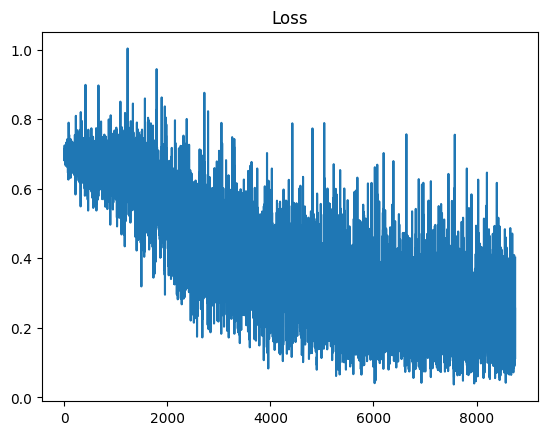

In [11]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.title("Loss")